In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US= df[(df["job_country"] == "United States")].dropna(subset=["salary_year_avg"])

In [4]:
job_titles = df_US["job_title_short"].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]

In [6]:
df_job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

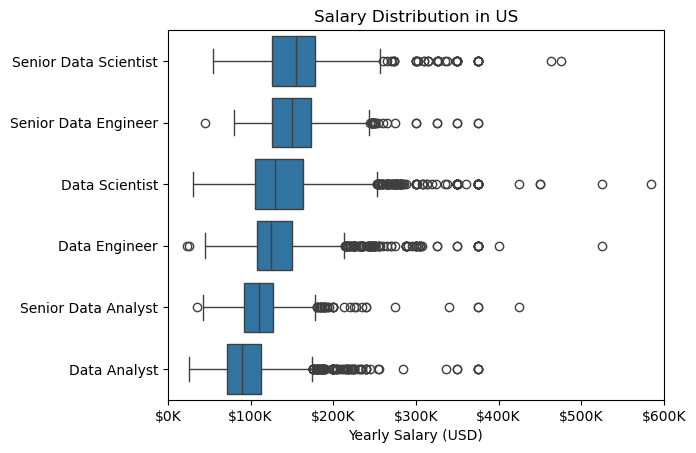

In [7]:
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short",order=df_job_order )
plt.title("Salary Distribution in US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ticks_x = plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.xlim(0, 600000)
plt.show()

In [10]:
# Investigate Median salary vs Skill for Data Analysts
df_US_DA = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_US_DA = df_US_DA.dropna(subset=["salary_year_avg"])

In [21]:
df_US_DA = df_US_DA.explode("job_skills")
df_US_DA[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [31]:
df_DA_top_pay = df_US_DA.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [39]:
df_skills_DA = df_US_DA.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)
df_skills_DA = df_skills_DA.head(10).sort_values(by="median", ascending=False)
df_skills_DA

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


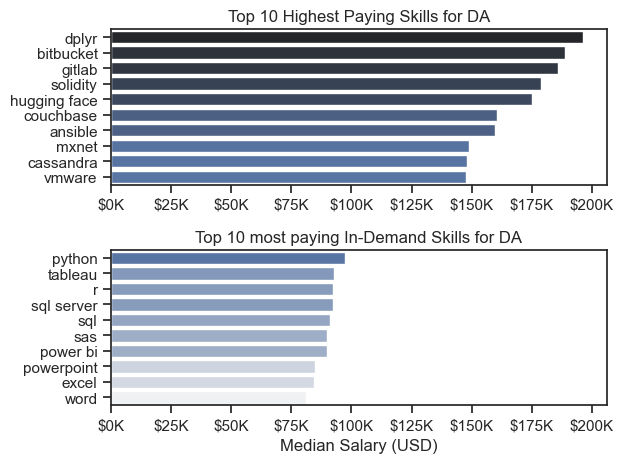

In [41]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r", legend=False)
ax[0].set_title("Top 10 Highest Paying Skills for DA")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

#Top 10 in-demand skills for DA
sns.barplot(data=df_skills_DA, x="median", y=df_skills_DA.index, ax=ax[1], hue="median", palette="light:b", legend=False)
ax[1].set_title("Top 10 most paying In-Demand Skills for DA")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout()
plt.show()